# Σύντομη εισαγωγή στη MATLAB&reg;

## Ανάγνωση αρχείων CSV, προεπεξεργασία δεδομένων, σχεδιασμός στατιστικών διαγραμμάτων.

Για τις ανάγκες του μαθήματος ΜΟΠ 511 "Εφαρμοσμένη Γεωστατιστική" της σχολής Μηχανικών Ορυκτών Πόρων του Πολυτεχνείου Κρήτης.

Μανώλης Πετράκης, Νοέμβριος 2018

---------------------------------------------------------

## Το σύνολο δεδομένων: Ποσοστό Καλίου στη γεώτρηση Mountain Home Well

Θα εξετάσουμε ένα αρχείο μετρήσεων ποσοστού Καλίου
κατά μήκος της γεώτρησης Mountain Home Well, από το Snake River Plain, Idaho. 
Οι μετρήσεις έγιναν στα πλαίσια του έργου HOTSPOT που είχε στόχο να αξιολογήσει το γεωθερμικό
δυναμικό του Snake River Plain. Τα δεδομένα παρέχονται από τον συνεργάτη του προγράμματος Doug Schmitt,
του Πανεπιστημίου της Αλμπέρτα, με άδεια [Creative Commons
Attribution 4.0](https://creativecommons.org/licenses/by/4.0/). Μπορείτε να βρείτε περισσότερες πληροφορίες στους συνδέσμους:

 * [Η βάση δεδομένων](https://openei.org/doe-opendata/dataset/mountain-home-well-borehole-geophysics-database)
 * [Φωτογραφίες από το πεδίο](https://gdr.openei.org/submissions/289)
 * [Gamma-ray logging](https://en.wikipedia.org/wiki/Gamma_ray_logging)

Το αρχείο είναι της μορφής CSV (Comma-Separated Values, κατάληξη `.csv`), δηλαδή είναι
ένα απλό αρχείο κειμένου με τιμές που διαχωρίζονται με κόμματα. Πρόκειται για το αρχείο `Mountain_Home_K.csv`, που δημιουργήθηκε με το λογισμικό [WellCAD](https://www.rockware.com/product/wellcad/).

## Ανάγνωση του .csv αρχείου (the data scientist's way)

In [1]:
data_table = readtable('../datasets/Mountain_Home_K.csv');

Με τη `readtable` διαβάσαμε το αρχείο `Mountain_Home_K.csv` που βρίσκεται στο φάκελο
`datasets` ο οποίος με τη σειρά του βρίσκεται ένα φάκελο πίσω (`..`) από
τον φάκελο στον οποίο δουλεύουμε. Αποθηκεύουμε τα περιεχόμενα του
`Mountain_Home_K.csv` στη μεταβλητή `data_table` η οποία είναι [τύπου](https://www.mathworks.com/help/matlab/data-types.html) table και όχι πίνακα. Ο τύπος table είναι χρήσιμος για δεδομένα μικτού τύπου καιτα οποία έχουν δομή παρόμοια ενός φύλλου εργασίας Excel&reg;.

*Protip: Πατώντας `F1` και έχοντας επιλέξει μια εντολή της MATLAB&reg; στον Editor ή στο
Command Window παίρνουμε βοήθεια για την εντολή.*

In [2]:
summary(data_table)


Variables:

    Depth: 10533×1 cell array of character vectors

    K: 10533×1 cell array of character vectors




Η `summary` μας δίνει μια περίληψη για το τι περιέχει μια μεταβλητή τύπου table. Βλέπουμε ότι η μεταβλητή `data_table` περιέχει δύο διανύσματα, τα `Depth` και `K` (το σύμβολο για το χημικό στοιχείο Κάλιο, _Kallium_ στα λατινικά) τα οποία είναι τύπου cell με χαρακτήρες και μήκος 10533 το καθένα.

Για να δούμε τι περιέχουν οι πρώτες 10 γραμμές του `data_table`. "Επέστρεψέ μου τις γραμμές από 1 έως 10 (`1:10`) και *όλες* τις στήλες (`:`)":

In [3]:
data_table(1:10, :)


ans =

  10×2 table

     Depth          K    
    ________    _________

    'm'         '%'      
    '619.02'    '-999.25'
    '619.12'    '1.68484'
    '619.22'    '1.70755'
    '619.32'    '1.63331'
    '619.42'    '1.48837'
    '619.52'    '1.337'  
    '619.62'    '1.24284'
    '619.72'    '1.22368'
    '619.82'    '1.26685'




Η `readtable` έχει διαβάσει τη δεύτερη γραμμή ως μέτρηση, ενώ στη πραγματικότητα η δεύτερη γραμμή περιέχει τις μονάδες μέτρησης των στηλών. Επίσης, η πρώτη μέτρηση φαίνεται ύποπτη, γιατί έχει αρνητική τιμή.

Για να δούμε τις τελευταίες 10 γραμμές. "Επέστρεψέ μου τις γραμμές από τη 10η πριν το τέλος μέχρι και την τελευταία (`end-9:end`) και *όλες* τις στήλες (`:`):

In [4]:
data_table(end-9:end, :)


ans =

  10×2 table

      Depth          K     
    _________    __________

    '1671.16'    '0.42705' 
    '1671.26'    '0.43665' 
    '1671.36'    '0.424474'
    '1671.46'    '0.39481' 
    '1671.56'    '0.35648' 
    '1671.66'    '0.32285' 
    '1671.76'    '0.30505' 
    '1671.86'    '0'       
    '1671.96'    '0'       
    '1672.06'    '0'       




 * Η `end` είναι μια συντομογραφία για το τελευταίο στοιχείο.
 * *Προσοχή!* To `end-9` είναι το *δέκατο* πριν το τέλος στοιχείο.

Παρατηρούμε ότι υπάρχουν μετρήσεις με τιμή _ακριβώς_ μηδέν.

Τώρα που έχουμε μια εικόνα για το τι περιέχει το αρχείο μας, ας δουλέψουμε με πίνακες,
μιας και το σύνολο δεδομένων μας έχει την δομή ενός 10532 επί 2 πίνακα.

## Ανάγνωση του .csv αρχείου (the mathematician's way)

In [5]:
data_matrix = csvread('../datasets/Mountain_Home_K.csv', 2);

Με την εντολή `csvread` διαβάζουμε αρχεία CSV τα οποία περιέχουν αποκλειστικά αριθμούς, με εξαίρεση κάποιες γραμμές κειμένου στην αρχή, οι οποίες (αν είμαστε τυχεροί!), περιέχουν πληροφορία για τα ονόματα των μεταβλητών και τις μονάδες τους. Η ύπαρξη γραμμών κειμένου με πληροφορίες για το περιεχόμενο του αρχείου μετρήσεων είναι μια πρακτική η οποία επιβάλλεται να την ακολουθείτε και εσείς όταν καταγράφετε μετρήσεις.
 
Το πρώτο όρισμα της `csvread` είναι η τοποθεσία του αρχείου, ενώ το δεύτερο όρισμα είναι ο αριθμός των γραμμών που θέλουμε η
`csvread` να αγνοήσει από την αρχή του εν λόγω αρχείου. Δεν θα διαβάσουμε τις 2 πρώτες γραμμές, μιας και η πρώτη περιέχει το τι είναι η κάθε στήλη, ενώ η δεύτερη περιέχει τις μονάδες μέτρησης. Αποθηκεύουμε την έξοδο της `csvread` στη μεταβλητή `data_matrix` η οποία είναι πίνακας 10532 γραμμών επί 2 στήλες:

In [6]:
data_matrix(1:10, :)
size(data_matrix)


ans =

  619.0200 -999.2500
  619.1200    1.6848
  619.2200    1.7075
  619.3200    1.6333
  619.4200    1.4884
  619.5200    1.3370
  619.6200    1.2428
  619.7200    1.2237
  619.8200    1.2669
  619.9200    1.3437


ans =

       10532           2




* Η `size` επιστρέφει τις διαστάσεις του πίνακα.

*Δεν ξεχνάω ότι η πρώτη στήλη είναι το βάθος σε m ενώ η δεύτερη στήλη είναι το ποσοστό (%) Καλίου.*

Τώρα είμαστε έτοιμοι για το πρώτο μας γράφημα.

## Το πρώτο μας γράφημα

Στη συνέχεια, αν και δεν είναι απαραίτητο, δίνουμε στη μεταβλητή `depth` τις τιμές της πρώτης στήλης του `data_matrix`, και στη μεταβλητή `Κ` τις τιμές της δεύτερης στήλης του `data_matrix`:

In [7]:
depth = data_matrix(:,1);
K = data_matrix(:,2);

 * Θα μπορούσαμε να είχαμε γράψει και `K = data_matrix(:,end);`.

Η i-οστή γραμμή του `Κ` έχει τη μέτρηση του ποσοστού Καλίου που έγινε σε βάθος ίσο με την i-οστή γραμμή της `depth`. Τώρα είμαστε έτοιμοι για το πρώτο μας γράφημα.

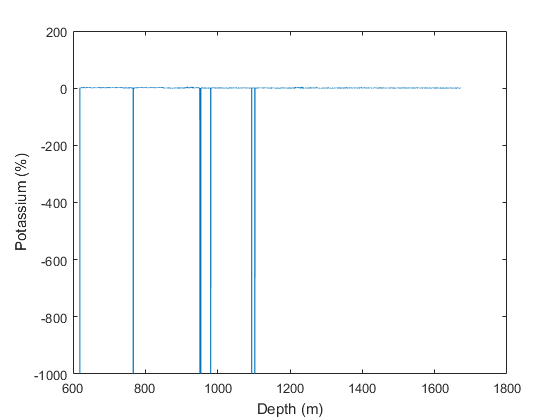

In [8]:
figure
plot(depth, K)
xlabel('Depth (m)')
ylabel('Potassium (%)')

 * Φτιάχνουμε ένα σχήμα σε νέο παράθυρο με τη `figure`.
 * Σχεδιάζουμε τα στοιχεία του `depth` ως προς τα στοιχεία του `Κ` με τη `plot`.
 * Δίνουμε τίτλους στον οριζόντιο (x) και κατακόρυφο (y) άξονα με τις `xlim` και `ylim` αντίστοιχα.

Ωχ, κάτι φαίνεται να μην πηγαίνει καλά! Πως μπορεί να έχουμε τόσο μεγάλες
αρνητικές τιμές; Τι μπορούμε να κάνουμε γιαυτό; Θα το απαντήσουμε σε λίγο.
Αν περιορίσουμε τον κατακόρυφο άξονα στο διάστημα [0, 5] έχουμε το ακόλουθο
γράφημα: 

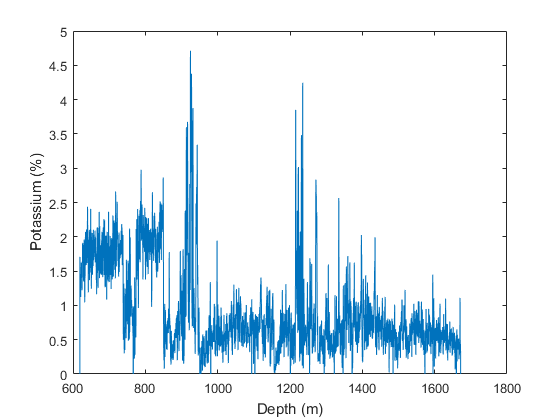

In [9]:
figure
plot(depth, K)
xlabel('Depth (m)')
ylabel('Potassium (%)')
ylim([0, 5])

* Χρησιμοποιήσαμε την `ylim` με όρισμα τα όρια του κατακόρυφου άξονα το διάνυσμα `[y_min, y_max]`.

## Προετοιμασία δεδομένων για στατιστική ανάλυση
Μπορούμε να αγνοήσουμε τις "προβληματικές" τιμές, αφαιρώντας
τις από το σύνολο δεδομένων. Μια τέτοιου είδους απλοϊκή αντιμετώπιση
είναι εφικτή γιατί στο σύνολό μας έχουμε αρκετές μετρήσεις. Μια άλλη λύση
θα ήταν η αντικατάσταση των προβληματικών τιμών με το αποτέλεσμα μιας
μεθόδου παρεμβολής υπολογισμένο στις προβληματικές θέσεις. 

Ας βρούμε τις γραμμές (δείκτες) στις οποίες έχουμε μη-αρνητικό ποσοστό Καλίου:

In [10]:
accepted_rows = (K >= 0);

Τι κάναμε εδώ;

* Με την `K>=0` παίρνουμε ένα διάνυσμα τύπου logical με τιμές 0 ή 1. Αν το i-οστό στοιχείο του `K` ικανοποιεί την ανισότητα, το i-οστό στοιχείο του λογικού διανύσματος παίρνει τη τιμή 1 (true, αληθές), αλλιώς παίρνει τη τιμή 0 (false, ψευδές).
* Οι παρενθέσεις μπαίνουν για σαφήνεια.
* Το αποτέλεσμα της λογικής πράξης αποθηκεύεται στο διάνυσμα `accepted_rows` που είναι τύπου logical.

Πόσες γραμμές είναι αποδεκτές;

In [11]:
sum(accepted_rows)


ans =

       10468




* Αθροίζω τα στοιχεία του διανύσματος `accepted_rows`. Εφόσον αυτό περιέχει 0 και 1, το άθροισμα είναι ίσο με το πλήθος των γραμμών που ικανοποιούν την ανισότητα αποδοχής.

Πόσες γραμμές είναι μη-αποδεκτές;

In [12]:
rejected_rows = ~accepted_rows;
sum(rejected_rows)


ans =

    64




* Ο τελεστής `~` (τίλντα) επιστρέφει ένα διάνυσμα τύπου logical που περιέχει 1 εκεί που η `accepted_rows` περιέχει 0, και 0 εκεί όπου `accepted_rows` *δεν* περιέχει 0. 

Sanity check: Η μεγαλύτερη διάσταση του πίνακα `data_matrix`, που είναι ίση με τον αριθμό των γραμμών, άρα και των μετρήσεων, _μείον_ τον αριθμό τον γραμμών που περιέχουν έγκυρες μετρήσεις, θα πρέπει να είναι _ίσες_ με τον αριθμό των γραμμών που απορρίψαμε. Είναι;

In [13]:
length(data_matrix) - sum(accepted_rows) == sum(rejected_rows)


ans =

  logical

   1




Ναι!

* Τα διπλά ίσον `==` είναι ο τελεστής ελέγχου ισότητας. Επιστρέφει 1 (true) αν η  ισότητα επαληθεύεται. Το μονό ίσον `=` είναι ο τελεστής εκχώρησης!

Ας κρατήσουμε μονάχα τις έγκυρες μετρήσεις:

In [14]:
depth = depth(accepted_rows);
K = K(accepted_rows);

* Ένα διάνυσμα τύπου logical (όπως το `accepted_rows`) όταν δοθεί ως  όρισμα σε ένα διάνυσμα (όπως το `depth`), επιστρέφει τα στοιχεία από τις θέσεις στις οποίες το διάνυσμα τύπου `logical` είναι αληθές.

Σε αυτή την ενότητα είδαμε λίγη από τη μαγεία της MATLAB&reg;! Ο προγραμματισμός κατ' αυτόν τον τρόπο στη MATLAB&reg; αποτελεί καλή πρακτική.

Έχοντας αφαιρέσει τις γραμμές οι οποίες είχαν προβληματικές τιμές, ας ξανασχεδιάσουμε το ποσοστό Καλίου σε σχέση με το βάθος:

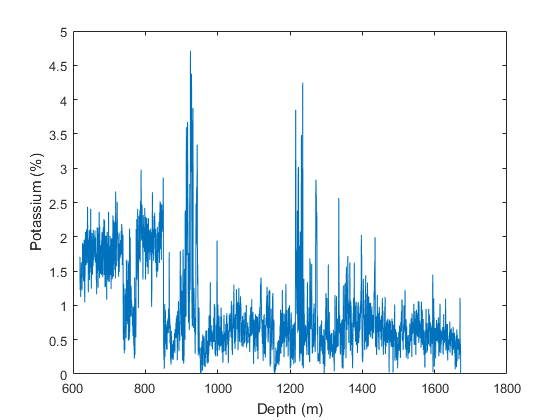

In [15]:
figure
plot(depth, K)
xlabel('Depth (m)')
ylabel('Potassium (%)')

## Το πρώτο μας ιστόγραμμα και η πρώτη μας βασική στατιστική ανάλυση

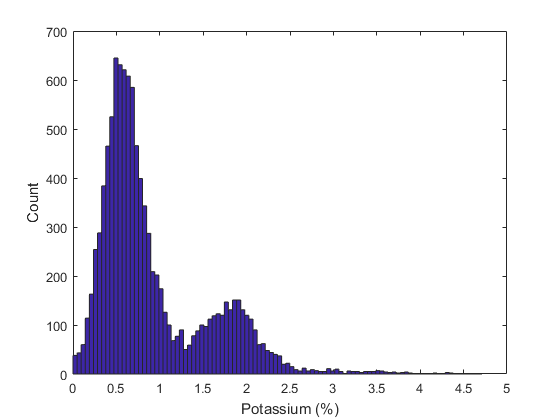

In [16]:
figure
hist(K, 100)
xlabel('Potassium (%)')
ylabel('Count')

Η `hist` δέχεται ως πρώτο όρισμα ένα διάνυσμα (εδώ το `K`), και προαιρετικά τον αριθμό των ισομηκών διαστημάτων ("κουτιών") στα οποία θέλουμε να καταταγούν τα στοιχεία του διανύσματος (εδώ 100). Ας υπολογίσουμε την ελάχιστη (`min`) και μέγιστη (`max`) τιμη του `K`:

In [17]:
min(K)
max(K)


ans =

     0


ans =

    4.7125




Ας υπολογίσουμε τη μέση τιμή (`mean`), διάμεσο (`median`), και τη συχνότερη τιμή (`mode`):

In [18]:
mean(K)
median(K)
mode(K)


ans =

    0.9233


ans =

    0.6905


ans =

     0




*Ερώτηση:*

* Σε ποια σημεία του ιστογράμματος (και γιατί) βρίσκονται οι παραπάνω τιμές;  

Πόσα μηδενικά έχουν οι μετρήσεις μας;

In [19]:
sum(K==0)


ans =

     3




*Ερωτήσεις:*

* Γιατί η κορυφή του ιστογράμματος δεν είναι στο μηδέν;
* Γιατί η συχνότερη τιμή δεν αντιστοιχεί με την κορυφή του ιστογράμματος;

Ας κρατήσουμε τις μετρήσεις που έχουν γίνει σε βάθος μικρότερο των 730 m:

In [20]:
less_than_730m = (depth < 730);
depth_730 = depth(less_than_730m);
K_730 = K(less_than_730m);

Πόσες μετρήσεις κρατήσαμε;

In [21]:
size(K_730)


ans =

        1109           1




Ο `Κ_730` έχει 1109 γραμμές (που αντιστοιχούν σε 1109 μετρήσεις) και 1 στήλη. Ας σχεδιάσουμε το ποσοστό Καλίου για βάθη μέχρι 730 μέτρα:

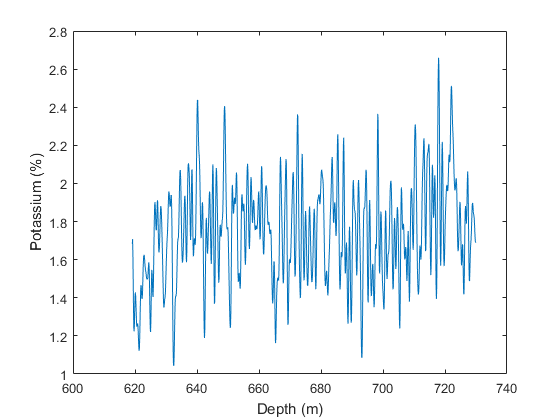

In [22]:
figure
plot(depth_730, K_730)
xlabel('Depth (m)')
ylabel('Potassium (%)')

Ας σχεδιάσουμε ένα ιστόγραμμα μαζί με προσαρμογή μιας κανονικής (normal, ή γκαουσιανής, gaussian) κατανομής. Να σας υπενθυμίσω την _πυκνότητα_ πιθανότητας της κανονικής κατανομής (που όλοι αγαπάμε) με μέση τιμή $\mu$ και διασπορά $\sigma^2$:

$$p(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-{\frac{(x-\mu)^2}{2\sigma^2}}}$$

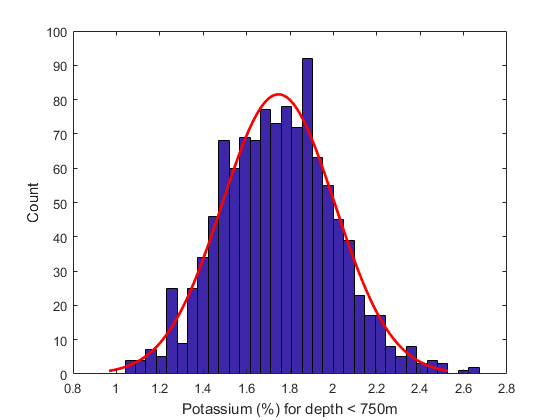

In [23]:
figure
histfit(K_730)
xlabel('Potassium (%) for depth < 750m');
ylabel('Count')

* Η `histfit` σχεδιάζει ένα ιστόγραμμα με αριθμό κουτιών ίσου με την τετραγωνική ρίζα του πλήθους των στοιχείων του ορίσματος, προσαρμόζει μια κανονική κατανομή, και τη σχεδιάζει μαζί με το ιστόγραμμα.

*Bonus points:*

* Είναι όντως _πυκνότητα_ πιθανότητας η συνεχής καμπύλη του διαγράμματος; 

Το _γράφημα κανονικής πιθανότητας_ μας βοηθάει να να αξιολογήσουμε οπτικά αν τα δεδομένα προέρχονται από έναν πληθυσμό με κανονική κατανομή:

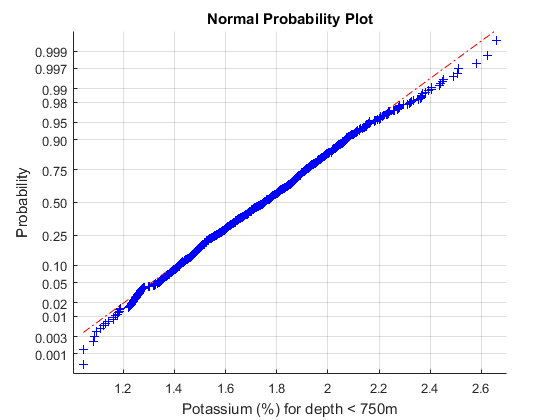

In [24]:
figure
normplot(K_730)
xlabel('Potassium (%) for depth < 750m')

* Η `normplot` σχεδιάζει το γράφημα κανονικής πιθανότητας.
* Αν οι μετρήσεις (με σταυρό (+) στο γράφημα) είναι πάνω στη γραμμή, προέρχονται από έναν πληθυσμό με κανονική κατανομή.

Οι μετρήσεις ποσοστού Καλίου για βάθη < 750m φαίνεται να είναι _σατανικά κοντά_ στη κανονική κατανομή!

## Αποθήκευση πινάκων MATLAB&reg; σε αρχείο
Ας αποθηκεύσουμε τα δεδομένα που προεπεξεργαστήκαμε σε μορφή πίνακα MATLAB&reg; για μελλοντική ανάλυση:

In [25]:
mountain_home_K = [depth, K];
save('../exports/Mountain_Home_K', 'mountain_home_K')

* Ορίζουμε τον πίνακα `mountain_home_K` με δύο στήλες, τις τιμές του βάθους και το ποσοστό Καλίου.
* Πάμε ένα φάκελο πίσω (`..`) και αποθηκεύουμε τον πίνακα `mountain_home_K` στο αρχείο `Mountain_Home_K_small` το οποίο (αυτόματα) θα έχει κατάληξη `.mat`, και έχει μορφή αναγνωρίσιμη από τη MATLAB&reg;. 

Τελειώνουμε με την αποθήκευση του μικρότερο συνόλου μετρήσεων:

In [26]:
mountain_home_K_small = [depth_730, K_730];
save('../exports/Mountain_Home_K_small', 'mountain_home_K_small')

Πριν κλείσουμε, θα ήθελα να θυμόσαστε τα ακόλουθα, τα οποία ίσως είναι σημαντικότερα από το πως συντάσσονται συγκεκριμένες εντολές της MATLAB&reg;, το οποίες άλλωστε σίγουρα θα το ξεχάσετε με τον καιρό. 

## Καλές πρακτικές προγραμματισμού και ανάλυσης δεδομένων
Τα μικροπροβλήματα που παρουσιάστηκαν κατά την ανάγνωση των δεδομένων είναι πολύ συνηθισμένα όταν πρόκειται να διαχειριστούμε πραγματικά δεδομένα που προέρχονται από διάφορες πηγές. Η διαδικασία μετατροπής πρωτογενών δεδομένων σε επεξεργάσιμη μορφή λέγεται [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling). Αν σας ενδιαφέρει η ανάλυση δεδομένων γενικότερα, καλό θα ήταν να ρίξετε μια ματιά στα εργαλεία που προσφέρουν γλώσσες όπως η Python ή η R, και αποτελούν ελεύθερο λογισμικό, σε αντίθεση με τη MATLAB&reg;. Η MATLAB&reg; ξεκίνησε ως υπολογιστικό περιβάλλον με δυνατότητες γραμμικής άλγεβρας και σχεδιασμού γραφημάτων, έχοντας ως αγοραστικό κοινό (μεταξύ άλλων) ανθρώπους που δεν ήθελαν να προγραμματίζουν σε FORTRAN.

Είναι προτιμητέο στη MATLAB&reg; να δουλεύουμε με δεδομένα τακτοποιημένα σε μορφή πινάκων (του ίδιου τύπου, χωρίς κενά και μη-αποδεκτές τιμές) για λόγους απόδοσης και συμβατότητας, μιας και εργαλεία για επεξεργασία ετερογενών δεδομένων είναι διαθέσιμα μονάχα στις πιο πρόσφατες εκδόσεις. Επίσης, είναι καλή πρακτική, στη περίπτωση που αποθηκεύουμε δεδομένα, να συνοδεύουμε τα δεδομένα με σαφείς οδηγίες για το περιεχόμενο των αρχείων, όπως και οδηγίες ανάγνωσής τους. Ο χρήστης (που μπορεί να είστε εσείς μετά από 6 μήνες και να μη θυμάστε τι και πως το έχετε αποθηκεύσει) θα πρέπει να γνωρίζει σε τι αντιστοιχούν οι γραμμές και οι στήλες του αρχείου, τις μονάδες τους, και το τι σημαίνουν "μη-κανονικές" τιμές, όπως π.χ. `-999`, `NaN`, `Inf` ή μηδενικά (σε περιπτώσεις που η μετρούμενη ποσότητα δεν μπορεί να είναι μηδέν).

Φροντίζουμε ώστε τα ονόματα των μεταβλητών και των αρχείων μας να είναι σαφή και περιγραφικά. Δεν χρειάζεται να κάνουμε οικονομία στο μέγεθός τους. Περισσότερες καλές πρακτικές συγγραφής κώδικα MATLAB&reg; θα βρείτε στους ακόλουθους συνδέσμους:

* [Matlab style guide](https://erikreinertsen.com/matlab-style-guide/).
* [The Elements of MATLAB Style](https://www.cambridge.org/core/books/elements-of-matlab-style/8825411CE69013434DB0939780CFD907) (βιβλίο).
* [Matlab Style Guidelines Cheat Sheet](https://www.mathworks.com/matlabcentral/fileexchange/45047-matlab-style-guidelines-cheat-sheet?focused=bb5d423a-49d8-424e-a4d8-794869ba858e&tab=example) (βασισμένο στο παραπάνω βιβλίο).

Χρησιμοποιούμε τα εργαλεία για τα οποία φημίζεται η γλώσσα προγραμματισμού στην οποία γράφουμε κώδικα, ειδάλλως δεν θα είχε νόημα να χρησιμοποιούμε τη συγκεκριμένη γλώσσα. Είδαμε με πόσο κομψό και λιτό τρόπο μπορούμε να διαχειριζόμαστε πίνακες στη MATLAB&reg; δουλεύοντας με δείκτες. Οι γλώσσες προγραμματισμού είναι όπως τα εργαλεία σε ένα συνεργείο: διαλέγουμε την καταλληλότερη γλώσσα για το πρόβλημα που έχουμε να λύσουμε. Αυτό σημαίνει ότι η MATLAB&reg; δεν είναι πάντα καλή επιλογή. Στη σημερινή αγορά εργασίας είναι δύσκολο να επιβιώσει κάποιος κατέχοντας μονάχα μια γλώσσα προγραμματισμού ή ένα υπολογιστικό πακέτο.

## Τι μάθαμε σε αυτό το μάθημα
* Ανάγνωση αρχείων μορφής CSV.
* Σχεδιασμό γραφημάτων.
* Προετοιμασία δεδομένων για ανάλυση.
* Ιστόγραμμα, ιστόγραμμα με προσαρμογή καμπύλης κανονικής κατανομής, γράφημα κανονικής πιθανότητας.
* Αποθήκευση πινάκων MATLAB&reg; σε αρχείο.
* Μερικές καλές πρακτικές προγραμματισμού και ανάλυσης δεδομένων.
-----------------
[Happy Hacking!](https://stallman.org/articles/happy-hacking.html)